# Lab-1

## 1. 实验结构

首先进行的第一个实验是信息瀑布实验，该实验再Veconlab网站上完成。在实验前，参与者被分为了两个大组进行实验。对于每个大组，参与者被分到由6人组成的小组进行实验。实验分为6轮，每个小组的在每一轮中的成员固定，但每轮小组成员的顺序会变化。

对于每个小组的每轮实验，计算机会生成1-6中的一个随机数，如果在1-3之间，则表示给出一个红色杯子；如果在4-6之间，则表示给出一个蓝色杯子。在红色的杯子中，有2个红球和1个蓝球；在蓝色的杯子中，有2个蓝球和1个红球。小组成员会从给定的杯子中抽一个球然后放回，以颜色做为他们每人的私人信息，他人不知道。随后小组成员按给定顺序依次对杯子的颜色进行其他组员公布自己的猜测。在6位参与者依次完成全部猜测后，杯子的颜色将被公开，猜对的参与者获得2美元，猜错的获得0.5美元。

## 2. 实验目标检验的理论

实验主要在于检验羊群效应中的信息瀑布现象。信息瀑布（information cascade）是指当人们不论其私人信息如何都做出一致的决策的现象，其假设前提是个人将其他人的行为发出的信号等同于他们的私有信息，这就是运用启发法进行判断的结果。其本质属于基于信息外部性的羊群行为，不完全理性个体采用启发式对概率进行判断然后决策。而完全理性的个体会考虑自身信息根据正确的条件概率推算出不同猜测结果的概率来做决策。

### 2.1. 模拟数据

#### 2.1.1. 完全理性


对于理性的决策者，其行为符合根据贝叶斯原则：
$$
Pr(\mbox{Red|n Red Signals, m Blue Signals}){ = Pr(R|n, m)\\ =\frac{Pr(\mbox{n, m|R})Pr(R)}{Pr(\mbox{n, m|R})Pr(R)+Pr(\mbox{n, m|B})Pr(B)}
\\=\frac{2^n}{2^n+2^m}
}
$$

例：对于一组完全理性的决策者，他们各自对红杯子的猜测概率如下（决策顺序从左往右）：


| 私人信息     | R    | B    | B    | R    | R    | R    |
| ------------ | ---- | ---- | ---- | ---- | ---- | ---- |
| 公有信息     | R    | B    | B    | R    | R    | R    |
| 红杯子的概率 | 2/3  | 1/2  | 1/3  | 1/2  | 2/3  | 4/5  |

对于第三个人来说，假定前面的两人给出的公有信息为R、B（第二人面临的红杯子的概率为1/2，其给出的公有信息随机，这里假设为B），其自己的私有信息为B。假定所有人决策符合贝叶斯原则，第三人的选择应该是B，其对应猜测为B的概率为2/3

在本实验中，所有参与者不可能都满足完全理性的假设。对此，位探究完全理性的情况，本文通过数据模拟的方式对完全理性进行了模拟（若参与者在贝叶斯原则下计算出红杯子的概率位0.5，则随机选择）。

In [214]:
library(ggplot2)
library(hrbrthemes)
library(reshape2)

In [215]:
num = 6
T = 10000

# Posterior Probability of Red Cup
temp <- c()
for(i in c(0:num)){
    for(j in c(0:num)){
        temp <- c(temp,2^i/(2^i+2^j))
    }
}
pro <- matrix(temp,num+1,num+1,byrow=T)

# Simulate T rounds(0 for Blue, 1 for Red)
set.seed(1)
cup <- sample(c(0,1),T,replace = TRUE, prob=c(0.5,0.5))
ball <- c()
for(i in c(1:T)){
    ball <- c(ball, sample(c(0,1),num,
                           replace = TRUE, 
                           prob=c(2/3-1/3*cup[i],1/3+1/3*cup[i])))
}
ball <- matrix(ball,T,num,byrow=T)
ball_r_signal <- t(cumsum(data.frame(t(ball))))
ball_b_signal <- -t(cumsum(data.frame(t(ball)-1)))

pro_05 <- sample(c(0,1),num*T,replace = TRUE, prob=c(0.5,0.5))
r <- rep(1,num)
color_all <- c()

In [216]:
for(i in 1:T){
    temp <- pro_05[((i-1)*num+1):(i*num)]
    ball_temp <- ball[i,]
    color <- c()
    
    for(j in 1:6){
        x = cumsum(ball_temp)[j]+1
        y = -cumsum(ball_temp-1)[j]+1
        pro_temp <- pro[x,y]
        
        if(pro_temp == 0.5){
            color <- c(color,temp[j])
            ball_temp[j] = temp[j]
        }
        else{
            if(pro_temp > 0.5){
                color <- c(color,1)
                ball_temp[j] = 1
            }
            else{
                color <- c(color,0)
                ball_temp[j] = 0
            }
        }
    }
    
    color_all <- c(color_all,color)
}

color_all <- matrix(color_all,T,num,byrow=T)

P1 <- colSums(color_all == cup)/T
P1

[1] 0.6704 0.6736 0.7124 0.7135 0.7240 0.7223

In [80]:
# plot
Plot_Pro <- function(data, x_lab, color="grey"){
    ggplot(data = data, aes(y=pro, x=id)) +
        geom_bar(stat = "identity",fill=color) +
        theme_ipsum() + theme_bw() + theme(legend.position="right") +
        theme(panel.border = element_blank(),
              axis.line = element_line(colour = "white")) +  
        ylab("Probability") + xlab(x_lab) +
        coord_cartesian(ylim=c(0,1)) +
        theme(axis.text.x = element_text(size=14),axis.text.y = element_text(size=14))+
        theme(axis.title.x = element_text(size=18),axis.title.y = element_text(size=18)) +
        theme(plot.title = element_text(size=10))
}

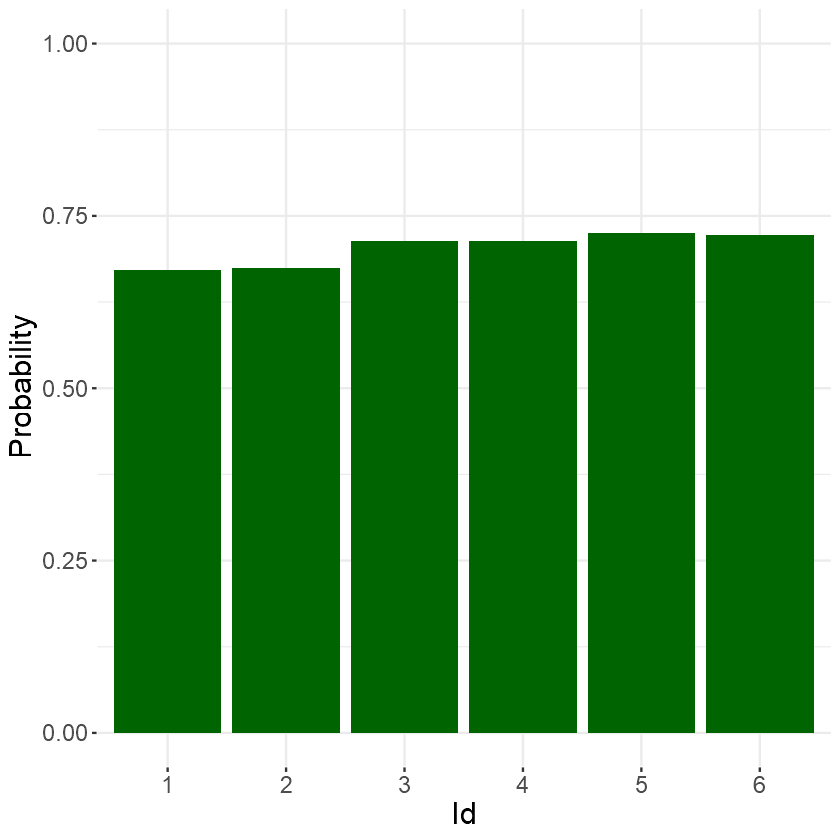

In [81]:
data <- data.frame(
    pro = P1,
    id = as.character(c(1:6))
)

Plot_Pro(data, "Id",color = "darkgreen")

In [220]:
# 1
r_CR <- c(sum(color_all[,num]==1)/T+sum(color_all[,num]==0)/T)
for(i in 2:num){
    r_CR <- c(r_CR, sum(rowSums(color_all[,(num+1-i):num]==1)==i)/T + sum(rowSums(color_all[,(num+1-i):num]==0)==i)/T)
}
r1<-r_CR
r1

[1] 1.0000 0.9913 0.9732 0.9531 0.8649 0.7718

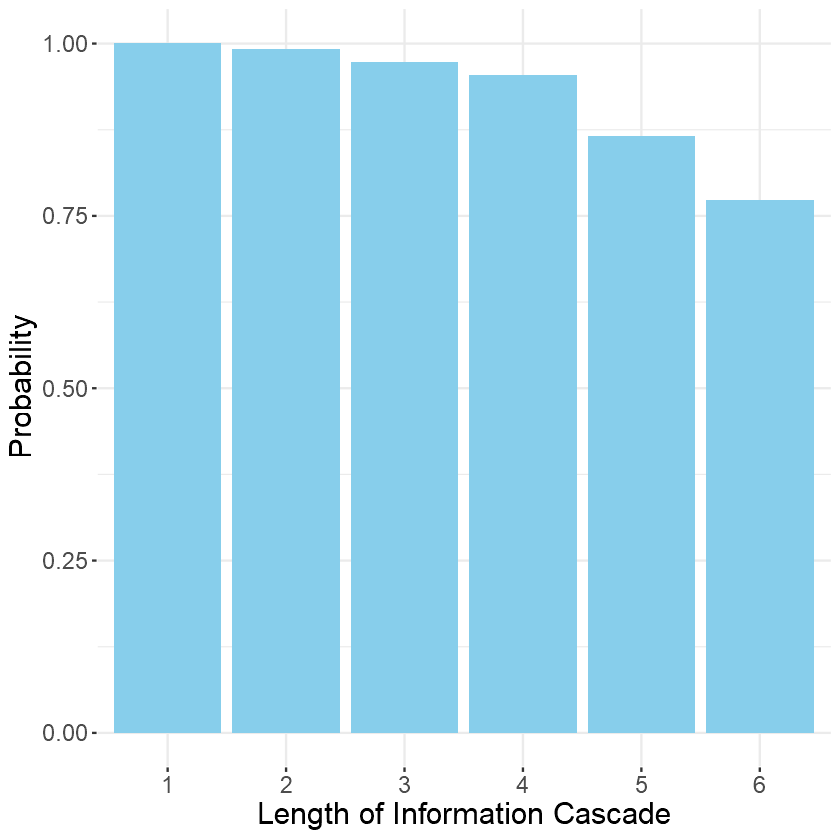

In [78]:
# plot
data <- data.frame(
    pro = r1,
    id = as.character(c(1:6))
)

Plot_Pro(data,"Length of Information Cascade",color = "skyblue")

### 2.2.2. 完全理性假设放宽--是否存在利他

以上的模拟，是在完全理性的假设下，但现实情况很复杂，可能由于噪声的存在，使得结果出现偏差。

首先，本文考虑，当面对1/2的概率时，可能交易者存在心理因素，如利他的想法（将自己的私有信息作为公共信息）或祸害他人的想法（将自己私有信息的反面作为公共信息）。本文将交易者按一定比例随机分为，在面临等概率情况下，给出和私有信息相同的人、给出和私有信息不同的人以及随机给出信息的人。

例：第二人在1/2概率的情况下给出了相反的信息，导致之后第三人的选择改变，且后续几人计算的红杯子的概率明显上升。

| 私人信息     | R    | B    | B    | R    | R    | R    |
| ------------ | ---- | ---- | ---- | ---- | ---- | ---- |
| 公有信息     | R    | **R**    | R    | R    | R    | R    |
| 红杯子的概率 | 2/3  | 1/2  | 8/9  | 16/17  | 32/33  | 64/65  |

In [97]:
Noise <- function(p,n,rd){
    peo <- sample(c(1,-1,0),num*T,replace = TRUE, prob=c(p,n,rd))
    peo <- matrix(peo,T,num,byrow=T)

    color_all <- c()
    count_05 = 0
    
    for(i in 1:T){
        temp <- pro_05[((i-1)*num+1):(i*num)]*(peo[i,]==0)
        temp <- temp + ball[i,]*(peo[i,]==1)
        temp <- temp + (ball[i,]==0)*(peo[i,]==-1)
        ball_temp <- ball[i,]
        color <- c()

        for(j in 1:6){
            x = cumsum(ball_temp)[j]+1
            y = -cumsum(ball_temp-1)[j]+1
            pro_temp <- pro[x,y]
            if(pro_temp == 0.5){
                color <- c(color,temp[j])
                ball_temp[j] = temp[j]
                count_05 = count_05 + 1
            }
            else{
                if(pro_temp > 0.5){
                    color <- c(color,1)
                    ball_temp[j] = 1
                }
                else{
                    color <- c(color,0)
                    ball_temp[j] = 0
                }
            }
        }

        color_all <- c(color_all,color)
    }

    color_all <- matrix(color_all,T,num,byrow=T)

    P <- colSums(color_all == cup)/T

    r2 <- c(sum(color_all[,num]==1)/T+sum(color_all[,num]==0)/T)
    for(i in 2:num){
        r2 <- c(r2, sum(rowSums(color_all[,(num+1-i):num]==1)==i)/T + sum(rowSums(color_all[,(num+1-i):num]==0)==i)/T)
    }
    return(list(P,r2,count_05/(T*num)))
}

In [98]:
A = Noise(1,0,0)
P_A = A[[1]]
r_A = A[[2]]
O = Noise(0,1,0)
P_O = O[[1]]
r_O = O[[2]]

In [149]:
Plot_Pro_Compared <- function(data, x_lab){
    ggplot(data = data, aes(y=pro, x=id,fill = class)) +
        geom_bar(stat = "identity",position = "dodge") +
        theme_ipsum() + theme_bw() + theme(legend.position="right") +
        theme(panel.border = element_blank(),
              axis.line = element_line(colour = "white")) +  
        ylab("Probability") + xlab(x_lab) +
        coord_cartesian(ylim=c(0,1)) +
        theme(axis.text.x = element_text(size=14),axis.text.y = element_text(size=14))+
        theme(axis.title.x = element_text(size=18),axis.title.y = element_text(size=18)) +
        theme(plot.title = element_text(size=10))
}

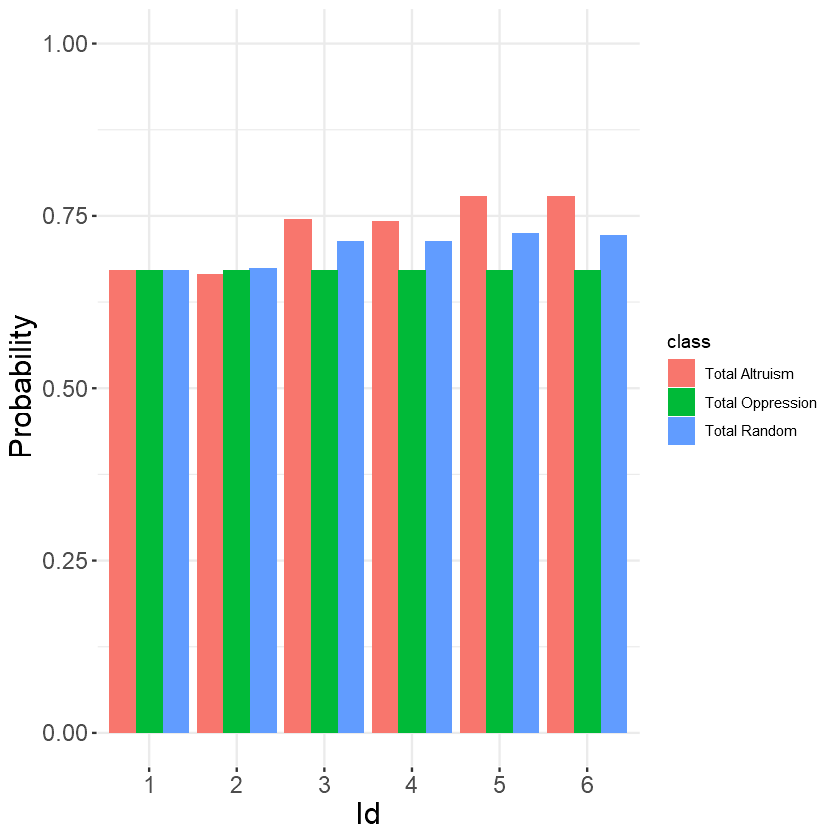

In [100]:
# plot
data <- data.frame(
    pro = c(P1,P_A,P_O),
    class = as.factor(c(rep("Total Random",6),rep("Total Altruism",6),rep("Total Oppression",6))),
    id = as.character(c(c(1:6),c(1:6),c(1:6)))
)
Plot_Pro_Compared(data,"Id")

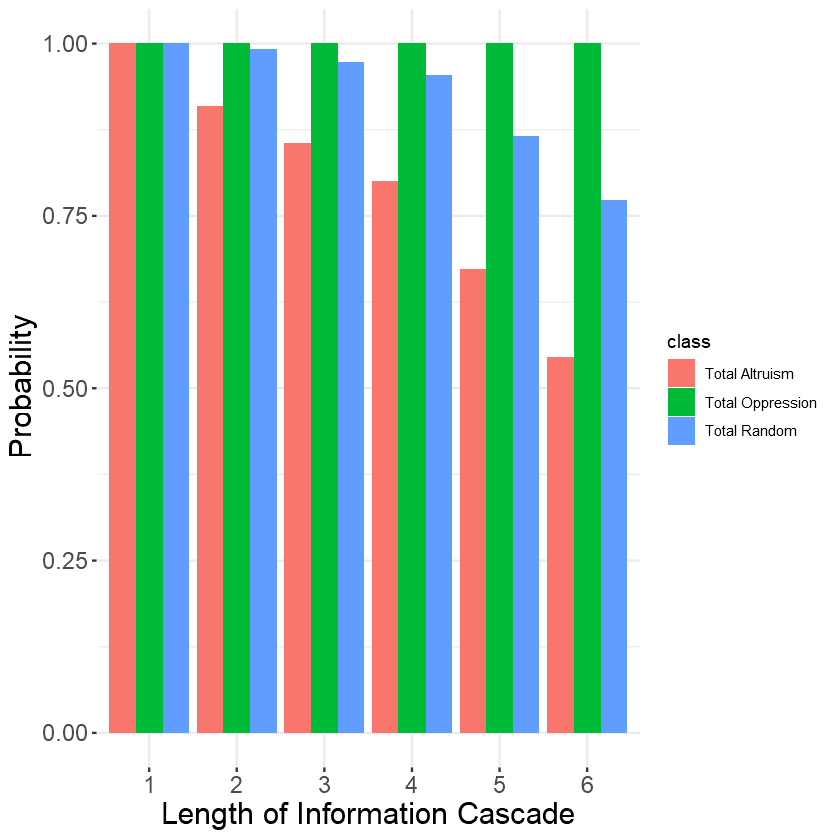

In [101]:
data <- data.frame(
    pro = c(r1,r_A,r_O),
    class = as.factor(c(rep("Total Random",6),rep("Total Altruism",6),rep("Total Oppression",6))),
    id = as.character(c(c(1:6),c(1:6),c(1:6)))
)
Plot_Pro_Compared(data,"Length of Information Cascade")

由模拟的情况可知，当面对1/2的概率时，若选择给出私人信息的人占比大，则之后整体的预测准确度有一定的上升；反之，若选择给出与私人信息相反信息的人占比大，则之后整体的预测准确度有一定的下降。即使面对1/2的概率的情况本身占比就很小（在本文的模拟中约占25\%，具体占比情况会随利他和给出相反信息的人占比变化而变化），其对信息瀑布现象的影响非常大。

假设极端情况下，所有面对1/2的概率的人选择给出相反的信息以干扰后人判断。首先，不妨设第一人私人信息为R，此时他给出信息R。对于第二人，若他私人信息为R则也会给出R，若私人信息为B，此时他面对的概率就为1/2，为干扰后人判断，他选择给出相反信息R。这样无论第二人私人信息如何，在这样极端情况下，前两个信息始终相同，而根据贝叶斯原则，无论第三人私人信息是R还是B，其都会选择给出与前两人相同的信息。以此类推，最终将会导致所有的人给出一致的结果，本文的数据模拟也很好地证实了这一点（最后6人中给出相同信息的占比为100\%）。



### 2.2.3. 完全理性假设放宽--是否存在认知偏差

第二种放款假设的方式就是，决策者单纯的以公共信息和私有信息中R、B的数量占比进行判断，R多则给出判断R，B多则给出判断B。

给出这一放宽的依据是，人在认知过程中的不完美表现，存在着认知偏差。具体而言，人们在认知过程中会尽力寻找捷径，考虑到我们有限的信息加工能力，我们总是试图采用把复杂问题简化的战略。


例：第五人和第六人在进行判断时，把复杂问题简化，单纯地将“红色出现次数/所有信息数量”作为测度概率的方法进行计算，导致了与贝叶斯原则不符的概率。

| 私人信息     | R    | B    | B    | R    | R    | R    |
| ------------ | ---- | ---- | ---- | ---- | ---- | ---- |
| 公有信息     | R    | B    | B    | R    | R    | R    |
| 红杯子的概率 | 2/3  | 1/2  | 1/3  | 1/2  | **3/5**  | **4/6**  |

In [165]:
r_p = 0.2
nr_p = 1-r_p
peo_m <- sample(c(1,0),num*T,replace = TRUE, prob=c(r_p,nr_p))
peo_m <- matrix(peo_m,T,num,byrow=T)

In [106]:
cumsum(ball_temp)[3]-cumsum(ball_temp-1)[3]

[1] 3

In [107]:
Cognation_Bias <- function(r_p){
    r_p = 0.2
    nr_p = 1-r_p
    peo_m <- sample(c(1,0),num*T,replace = TRUE, prob=c(r_p,nr_p))
    peo_m <- matrix(peo_m,T,num,byrow=T)

    color_all <- c()
    count_05 = 0
    
    for(i in 1:T){
        temp <- pro_05[((i-1)*num+1):(i*num)]
        ball_temp <- ball[i,]
        peo_temp <- peo_m[i,]
        color <- c()

        for(j in 1:6){
            if(peo_temp[j] == 0){
                pro_temp <- cumsum(ball_temp)[j]/j
            }
            else{
                x = cumsum(ball_temp)[j]+1
                y = -cumsum(ball_temp-1)[j]+1
                pro_temp <- pro[x,y]
            }
            
            if(pro_temp == 0.5){
                color <- c(color,temp[j])
                ball_temp[j] = temp[j]
                count_05 = count_05 + 1
            }
            else{
                if(pro_temp > 0.5){
                    color <- c(color,1)
                    ball_temp[j] = 1
                }
                else{
                    color <- c(color,0)
                    ball_temp[j] = 0
                }
            }
        }

        color_all <- c(color_all,color)
    }

    color_all <- matrix(color_all,T,num,byrow=T)

    P <- colSums(color_all == cup)/T

    r2 <- c(sum(color_all[,num]==1)/T+sum(color_all[,num]==0)/T)
    for(i in 2:num){
        r2 <- c(r2, sum(rowSums(color_all[,(num+1-i):num]==1)==i)/T + sum(rowSums(color_all[,(num+1-i):num]==0)==i)/T)
    }
    return(list(P,r2,count_05/(T*num)))
}

In [111]:
N <- Cognation_Bias(0)
P_N <- N[[1]]
r_N <- N[[2]]
R <- Cognation_Bias(1)
P_R <- R[[1]]
r_R <- R[[2]]

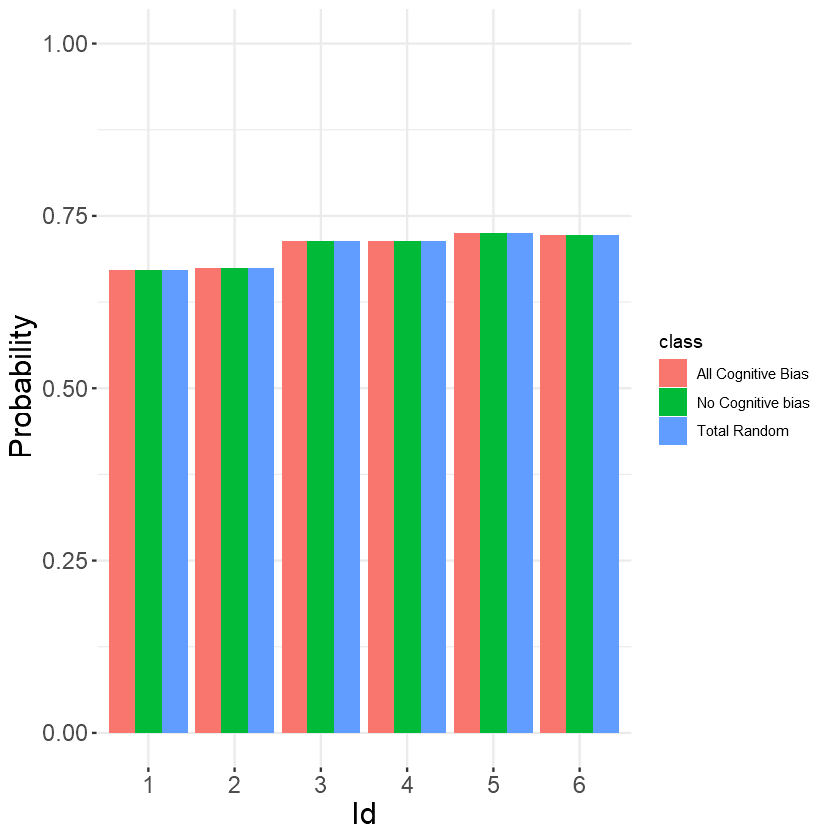

In [112]:
# plot
data <- data.frame(
    pro = c(P1,P_N,P_R),
    class = as.factor(c(rep("Total Random",6),rep("All Cognitive Bias",6),rep("No Cognitive bias",6))),
    id = as.character(c(c(1:6),c(1:6),c(1:6)))
)
Plot_Pro_Compared(data,"Id")

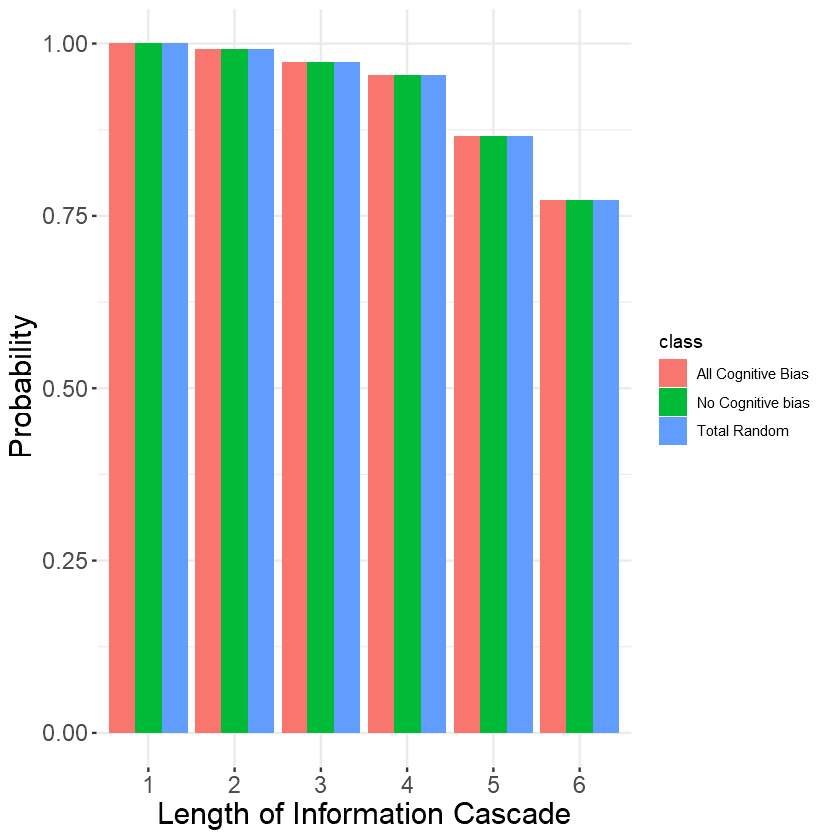

In [113]:
data <- data.frame(
    pro = c(r1,r_N,r_R),
    class = as.factor(c(rep("Total Random",6),rep("All Cognitive Bias",6),rep("No Cognitive bias",6))),
    id = as.character(c(c(1:6),c(1:6),c(1:6)))
)
Plot_Pro_Compared(data,"Length of Information Cascade")

In [1]:
n=6
temp <- c()
for(i in 0:n){
    for(j in 0:n){
        temp <- c(temp, i/(i+j))
    }
}
pro_cbias <- matrix(temp,n+1,n+1,byrow=T)
pro_cbias[1,1] = 0.5

temp <- c()
for(i in c(0:n)){
    for(j in c(0:n)){
        temp <- c(temp,2^i/(2^i+2^j))
    }
}
pro_bayes <- matrix(temp,n+1,n+1,byrow=T)


In [2]:
sum((pro_cbias>0.5)!=(pro_bayes>0.5))

[1] 0

对于本次，实验的情况，通过计算和模拟，本文发现，就算存在一定程度的认知偏差会导致对概率的计算与贝叶斯原理不相符，但并没有决策结果造成影响。在6人轮流进行决策的情况下，首先有贝叶斯算法和简单的算法（红色信号数/总信号数）计算出，在得到不同数量信号下红杯子猜测概率的矩阵（其中，简单算法下，设没有任何信息时，猜测概率为0.5）：

In [12]:
cbias <- data.frame(pro_cbias)
colnames(cbias) <- c(0:6)
rownames(cbias) <- c(0:6)
cbias

,0,1,2,3,4,5,6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.5,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
1,1.0,0.5000000,0.3333333,0.2500000,0.2000000,0.1666667,0.1428571
2,1.0,0.6666667,0.5000000,0.4000000,0.3333333,0.2857143,0.2500000
3,1.0,0.7500000,0.6000000,0.5000000,0.4285714,0.3750000,0.3333333
4,1.0,0.8000000,0.6666667,0.5714286,0.5000000,0.4444444,0.4000000
5,1.0,0.8333333,0.7142857,0.6250000,0.5555556,0.5000000,0.4545455
6,1.0,0.8571429,0.7500000,0.6666667,0.6000000,0.5454545,0.5000000


In [13]:
bs <- data.frame(pro_bayes)
colnames(bs) <- c(0:6)
rownames(bs) <- c(0:6)
bs

,0,1,2,3,4,5,6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.5000000,0.3333333,0.2000000,0.1111111,0.05882353,0.03030303,0.01538462
1,0.6666667,0.5000000,0.3333333,0.2000000,0.11111111,0.05882353,0.03030303
2,0.8000000,0.6666667,0.5000000,0.3333333,0.20000000,0.11111111,0.05882353
3,0.8888889,0.8000000,0.6666667,0.5000000,0.33333333,0.20000000,0.11111111
4,0.9411765,0.8888889,0.8000000,0.6666667,0.50000000,0.33333333,0.20000000
5,0.9696970,0.9411765,0.8888889,0.8000000,0.66666667,0.50000000,0.33333333
6,0.9846154,0.9696970,0.9411765,0.8888889,0.80000000,0.66666667,0.50000000


从中我们可以发现，即使两个矩阵的具体数值（除R、B信号数量相同时的猜测概率）大部分并不相同，但根据两中矩阵所做出的决策一致。在认知偏差这部分研究中，本文忽略了对概率计算错误的情况，但这部分仍为非常小的概率事件。由此，本文认为，认知偏差并不是信息瀑布现象出现的主要原因。

## 2.2. 真实数据

### 2.2.1. 是否存在利他心理

为进一步研究，本文继续将真实的实验数据进行了处理以探究是否真实存在利他和给出相反信息干扰他人的行为的存在，以及两者比例是否均衡（在两者占比几乎一致的情况下其相互间的影响会互相抵消，相当于参与者随机在1/2概率时给出决策）。

通过处理真实的实验数据，本文发现 第一二大组分别有65次和55次决策出现了1/2概率的情况， 其中两大组55次和45次选择给出了与自己相同的答案。两大组中利他行为的占比都很高，分别是约88.71\%和约81.82\%。但这以结果的出现也不能完全说明两大组的实验参与者中大部分人存在利他心理，也可能是过度自信导致的这一结果，但由于缺少相关参与者心理活动的数据，本文无法给出准确的结论。

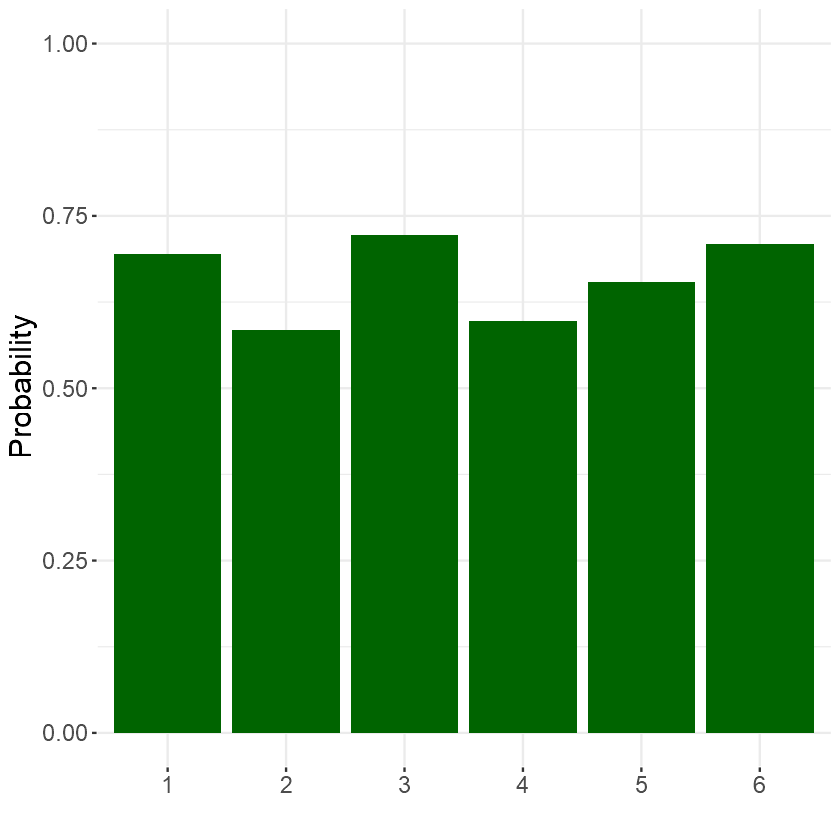

In [223]:
df <- read.table("de.csv",sep = ",")
df_tr <- read.table("tr.csv",sep=",")
df_cup <- read.table("cup.csv",sep=",")

df <- (df == "R")
df <- apply(df,2,as.numeric)
df_tr <- (df_tr == "R")
df_tr <- apply(df_tr,2,as.numeric)
df_cup <- (df_cup == "R")
df_cup <- apply(df_cup,2,as.numeric)

df_r <- t(cumsum(data.frame(t(df))))
df_b <- -t(cumsum(data.frame(t(df)-1)))

count_05 = 0
count_05_p = 0
for(i in 1:72){
    for(j in 1:6){
        x = df_r[i,j]+1
        y = df_b[i,j]+1
        pro_temp = pro[x,y]
        if(pro_temp == 0.5){
            count_05 = count_05+1
            if(df_tr[i,j]==df[i,j])
                count_05_p = count_05_p +1 
        }

    }
}

p_t <- as.numeric(colSums(df_cup==df)/72)
data <- data.frame(
    pro = p_t,
    id = as.character(c(1:6))
)
T = 72
r1 <- c(sum(df[,num]==1)/T+sum(df[,num]==0)/T)
for(i in 2:num){
    r1 <- c(r1, sum(rowSums(df[,(num+1-i):num]==1)==i)/T + sum(rowSums(df[,(num+1-i):num]==0)==i)/T)
}

Plot_Pro(data,"","darkgreen")

In [224]:
count_05_p

[1] 55

In [225]:
count_05

[1] 62

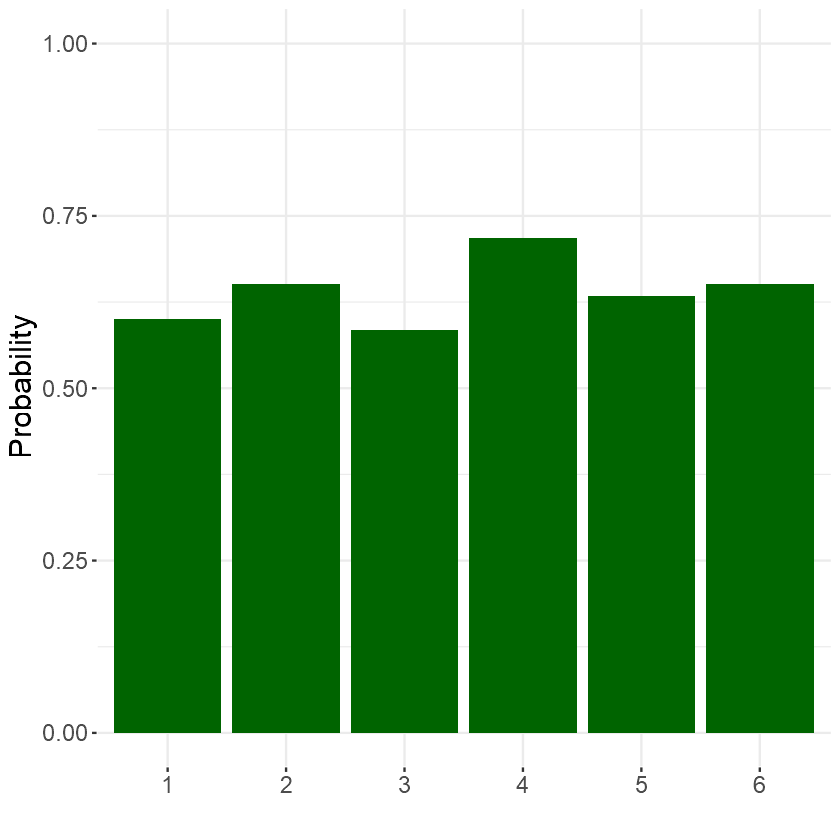

In [226]:
df <- read.table("de2.csv",sep = ",")
df_tr <- read.table("tr2.csv",sep=",")
df_cup <- read.table("cup2.csv",sep=",")

df <- (df == "R")
df <- apply(df,2,as.numeric)
df_tr <- (df_tr == "R")
df_tr <- apply(df_tr,2,as.numeric)
df_cup <- (df_cup == "R")
df_cup <- apply(df_cup,2,as.numeric)

df_r <- t(cumsum(data.frame(t(df))))
df_b <- -t(cumsum(data.frame(t(df)-1)))

count_05 = 0
count_05_p = 0
for(i in 1:60){
    for(j in 1:6){
        x = df_r[i,j]+1
        y = df_b[i,j]+1
        pro_temp = pro[x,y]
        if(pro_temp == 0.5){
            count_05 = count_05+1
            if(df_tr[i,j]==df[i,j])
                count_05_p = count_05_p +1 
        }

    }
}

p_t2 <- as.numeric(colSums(df_cup==df)/60)
data <- data.frame(
    pro = p_t2,
    id = as.character(c(1:6))
)
T = 60
r2 <- c(sum(df[,num]==1)/T+sum(df[,num]==0)/T)
for(i in 2:num){
    r2 <- c(r2, sum(rowSums(df[,(num+1-i):num]==1)==i)/T + sum(rowSums(df[,(num+1-i):num]==0)==i)/T)
}

Plot_Pro(data,"","darkgreen")

In [227]:
count_05_p

[1] 45

In [228]:
count_05

[1] 55

In [229]:
45/55

[1] 0.8181818

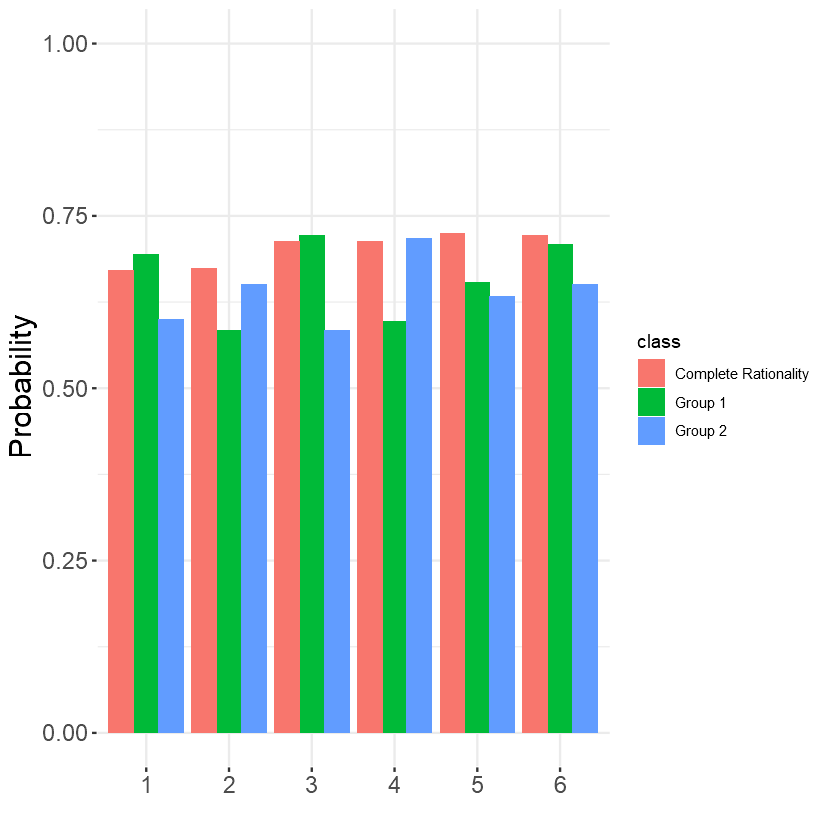

In [230]:
data <- data.frame(
    pro = c(p_t,p_t2,P1),
    class = as.factor(c(rep("Group 1",6),rep("Group 2",6),rep("Complete Rationality",6))),
    id = as.character(c(c(1:6),c(1:6),c(1:6)))
)
Plot_Pro_Compared(data,x_lab="")

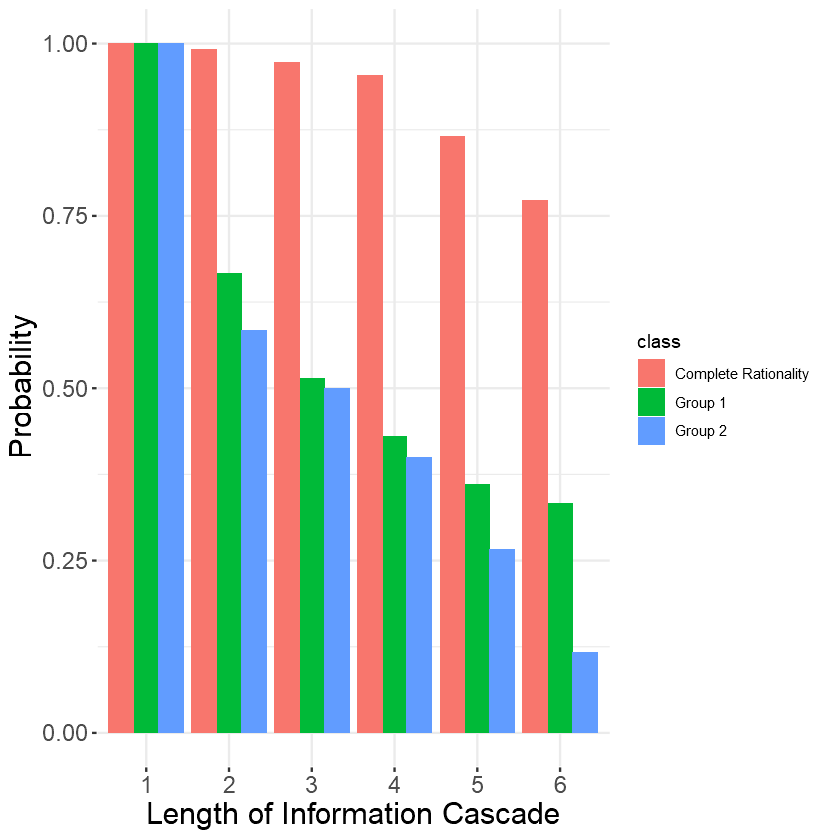

In [231]:
data <- data.frame(
    pro = c(r1,r2,r_CR),
    class = as.factor(c(rep("Group 1",6),rep("Group 2",6),rep("Complete Rationality",6))),
    id = as.character(c(c(1:6),c(1:6),c(1:6)))
)
Plot_Pro_Compared(data,x_lab="Length of Information Cascade")

### 2.2.2.  是否存在认知偏差

由前文对认知偏差的模拟和理论分析，本文认为，简化计算处理方式，采用非贝叶斯的计算方法，也能得到与贝叶斯原则下相同的决策结果。因此，本小节主要探讨计算错误下的认知偏差，即决策与猜测概率不符的情况。但由于现实情况非常复杂，有可能决策者是过度自信等多种心理原因而做出了违背概率测算的决策结果，所有本文无法对认知偏差的程度做出一个绝对的计算，仅供参考。

通过计算，本文发现，做出与概率不符合的决策，在第一二大组中，分别出现的次数为29和31，总占比分别为6.71\%和8.61\%。其较小的占比也说明了，前文在模拟数据考虑认知偏差时假定人们不会计算错误的合理性。此外这一部分决策，可能时由于认知偏差，也可能是其他心理因素所导致，由于缺乏相关参与者心理的数据，本文不能给出确定的结论。



In [207]:
df <- read.table("de.csv",sep = ",")
df_tr <- read.table("tr.csv",sep=",")
df_cup <- read.table("cup.csv",sep=",")

df <- (df == "R")
df <- apply(df,2,as.numeric)
df_tr <- (df_tr == "R")
df_tr <- apply(df_tr,2,as.numeric)
df_cup <- (df_cup == "R")
df_cup <- apply(df_cup,2,as.numeric)

df_r <- t(cumsum(data.frame(t(df))))
df_b <- -t(cumsum(data.frame(t(df)-1)))

count = 0
for(i in 1:72){
    for(j in 1:6){
        x = df_r[i,j]+1
        y = df_b[i,j]+1
        pro_temp = pro[x,y]
        if((pro_temp > 0.5 & df[i,j]==0)|(pro_temp<0.5 & df[i,j]==1)){
            count = count + 1
        }

    }
}

count

[1] 29

In [209]:
count/(72*6)

[1] 0.06712963

In [1]:
df <- read.table("de2.csv",sep = ",")
df_tr <- read.table("tr2.csv",sep=",")
df_cup <- read.table("cup2.csv",sep=",")

df <- (df == "R")
df <- apply(df,2,as.numeric)
df_tr <- (df_tr == "R")
df_tr <- apply(df_tr,2,as.numeric)
df_cup <- (df_cup == "R")
df_cup <- apply(df_cup,2,as.numeric)

df_r <- t(cumsum(data.frame(t(df))))
df_b <- -t(cumsum(data.frame(t(df)-1)))

count = 0
for(i in 1:60){
    for(j in 1:6){
        x = df_r[i,j]+1
        y = df_b[i,j]+1
        pro_temp = pro[x,y]
        if((pro_temp > 0.5 & df[i,j]==0)|(pro_temp<0.5 & df[i,j]==1)){
            count = count + 1
        }

    }
}

count

ERROR: Error in eval(expr, envir, enclos): 找不到对象'pro'


In [211]:
count/(60*6)

[1] 0.08611111

## 3. 总结

通过本文的模拟实验和真实实验数据分析，本文从利他心理和认知偏差的两个方向对信息瀑布现象进行了分析。在信息瀑布实验中，本文通过模拟数据发现，若参与者都能在决策时考虑到为后人决策提供有价值的信息，即当面临猜测概率为1/2时选择给出自己的私人信息而不是选择随机给出信息或者故意给出相反的信息干扰后人，那么参与者整体猜中的概率将会提升。最后对真实实验数据的统计也发现，在1/2概率时选择了给出私人信息的人数占比很大，但由于缺少相关心理活动的数据，本文并不能确认这一现象的出现是参与者主观上为了利他还是过度自信。对于认知偏差，考虑到贝叶斯原则下计算概率比较麻烦，人们通常会选择一个简单的概率计算方式来进行估计，本文给出了一个简单的计算方式，并证实了该方法下计算来的概率虽然不同，但不影响决策结果。实际的实验数据显示，做出违法贝叶斯原则下的决策结果的人数占比很小。

总体而言，通过与完全理性下的模拟的准确率相对比，真实实验中的准确率没有太大差别，但信息瀑布的程度要比完全理性下的模拟结果轻很多。本文认为其原因主要是参与者面对1/2概率时选择了与私人信息相同的信息的，其次是因为非贝叶斯原则下的决策的存在。由模拟数据中的小节可以看到，但整个决策群体为绝对的利他时，即所有人在面对1/2概率时会给出私人信息时，信息瀑布的程度要比随机给出结果轻很多。

## 4. 我的决策和经历

在本次实验中，我是info-xfzh18大组的26号，学号3180103159，6论实验我分别是第2、5、1、3、3、4次做决策。在决策过程中，考虑到贝叶斯计算方式比较麻烦，我直接对并了公共信息和私有信息中红和蓝信号的数量，对于哪一方数量较多，我就选择哪一方。同时，我也遇到了概率为1/2的情况，这是我选择给出了私有信息，其原因主要是两个方，一是为后人提供更有效的决策信息，二是对自己的私人信息有着过度自信的因素。整体而言，第二个因素是驱使我选择给出私有信息原因。


## 5. 学习到的内容

在这样的一个信息瀑布实验中，我们达到个人最优的决策只需参照贝叶斯原则进行决策，而但我们考虑到整体最优时，就需要参与者在面对1/2的猜测概率出现时，选择给出私人信息，方便为后人采用贝叶斯原则进行判断。

# Lab-2

## 1. 实验结构

本次实验为银行挤兑实验，该实验再Veconlab网站上完成。在实验前，参与者被分为了两个大组进行实验，其中第一大组为66人，第二大组为57人。对于每个大组，参与者会被分到两家银行，分别是Italy Bank和Spain Bank。所有的参与者都是对应银行的存款人，每人的存款金额为10美元。参与者一共进行10轮决策，前5轮决策没有存款保险制度，后5轮有存款保险制度。对于每轮，存款人可以选择取款或不取款。如果某一存款人要求提款，且银行没有破产，则存款人收入将是存款金额10美元；若该存款人要求提款，但此时银行已破产（要求提款人数过多被挤兑），且没有存款保险制度，则收存款人入将为0美元，若有存款保险制度，则收存款人入将为7美元；若存款人不提款，且银行最后没有破产，则存款人收入将是15美元，但银行最后破产了，则存款人的收入为0美元。

对于银行倒闭，本次实验定义为要求退款的人数超过总存款人数的50\%。其中每轮还有强制取款的机制，即每轮随机选取10\%的人进行强制取款。

## 2. 实验目标检验的理论

银行挤兑实验检验的是收益外部性引致的羊群行为，它是指单个参与者的收益结构会受到其他参与者行动的影响。这种收益外部性经常
由这个博弈的收益结构所外生的决定，但也可能内生的产生。如果参与者的战略是“战略互补”，那么每个人以某种确定的方式行动的动力就会增加，即随着一个人的战略优化，其他参与者的边际效用也增加了，在这样的情况下，参与者有相似行动的激励。

在这个实验中，存款人的收益结构会随着其他存款人中选择提款的人数变动而改变。随着提款人数增加，存款人对挤兑风险的预期增加，会出现评估10美元的可能亏损与未来5美元的可能收益。当提款人数很多时，破产风险大，其他存款人更可能选择提款，加速银行的破产。此外，在有无存款保险制度的不同情况下，存款者的收益结构也是不同的。在存在存款保险制度下，存款人需要权衡的是3美元的可能损失和5美元的可能收益，因此可能会接受更大的风险。

### 2.1. 结果分析

对实验后的数据进行统计得，第一二组两家银行的存款人在10轮的决策中都没有导致银行的破产。

两组的数据统计如下图所示：

![](D:\VSC\Behavioral_Finance\Lab_2\01.png)

![](D:\VSC\Behavioral_Finance\Lab_2\02.png)

从整体上看两组的前5轮决策的提款率比后5轮决策的提款率要高。其原因，一方面，存款保险制度降低了风险发生后存款人的损失程度。另一方面，在前5轮的决策后，并没有一家银行破产，在有了这5轮的实验数据后，参与者会用着历史数据来评估自己所处的情况，因此对后面5轮的预期较好。对于前5轮选择了没有提款的人，他们很可能会认为该方是比较有效赚取到收益的方法，而对于前5轮选择了提款的人，他们可能会因为存在后悔心理在未来决策中会选择取避免未来后悔的产生因此选择承担一定风险取换取可能的收益。

对于前5轮和后5轮（除第一大组的前5轮），他们也有着一些先相同之处，也就是整体上随着轮数的增加，5中的提款率会不断下降。但第一大组的前5轮并不符合这一情况。对于大部分出现的这种相似之处，其可能的原因是，存款人在完成第一轮决策后发现银行没有破产，由此对未来预期更好，选择不提款。而第5和6轮直接出现这一现象的断层，即前后两个5轮决策中这一现象并不连续，其原因可能是，新的5轮条件发生了变化（存款保险机制的出现），而存款人缺少当前情况下的实验历史信息，因此会偏向保守一点，当发现第6轮，即后5轮的第一轮结束后，银行没有破产，又会对未来预期较好，选择程度风险。

对于第一大组前5轮出现的异常情况，本文认为其原因可能为，刚开始实验时，存在部分不清楚实验具体的参与者花了相对较多的时间了解实验，使得参与者实验进度相差很大。有部分参与者可能很快完成了前三轮的测试，但后面还有部分参与者没有完成前面的测试，使得完成较快的这一部分人在第4轮作选择时缺乏比较完整的选择提款者数量的数据，因此在选择上倾向于更加保守，这也使得后面决策者看到了更高的提款率从而也会比较倾向于选择提款。而且完成决策快在第4轮缺乏足够信息时决策的时间会偏长，这也使得后面决策的人能够和快的这部分在第5轮赶上。到了第五轮，一些观望他人决策的人有了充足的数据调整自己的收益结构然后做出选择。且就算第4轮人们情绪出现了波动但也没破产，这使得人们对未来预期较好，导致了第5轮出现了较低的提款率。


## 3. 总结

通过分析实验结果，本文认为以往和当前存款人的决策信息以及外部条件（如有无存款保险制度）都对存款人是否调整收益结构从而改变决策有一定的影响。在本实验中，所有的决策轮次都没有出现挤兑破产现象，使得对挤兑情况下由于羊群效应人们会加快银行的破产没有完整数据。

## 4. 我的决策和经历

在本次实验中，我是第一大组xfzh20-2的10号参与者，学号3180103159。在实验的刚开始阶段，我觉得50\%的分界线还是比较难达到，然后头几次就选了不提款。后面银行没有破产，我也拿到了收益。基于历史数据的判断，即没有破产的出现，我对未来的预期更加乐观，同时也感觉大家应该也会有相同的感受。这更让我在主观上降低了对风险发生的预期，在后续的实验中也就都选择了不提款。对于第6-10轮的实验，由于考虑到有存款保险，即使损失发生也不会产生第一轮10美元的损失。于是我在后续的决策中也继续选择了不提款。


## 5. 学习到的内容

通过本次实验，我对收益外部性引致的羊群行为有了更加直观和深入的理解。在实验过程中，切身体会到了他人行为决策对我内心的收益结构的影响，使得我在决策过程中重新用新的数据评估情况，然后做出选择。此外，历史的成功数据和外部有无存款保险制度也对我决策过程产生了影响。

[1] 0